# Task #1: Risk Premium

Consider the setting of the last Python work sheet. Write a Python program that computes: (i) Expected Wealth, (ii) Certainty Equivalent, (iii) Risk Premium in Euros and (iv) Risk Premium in percentage terms. Compare these quantities for the two utility specifications of your last Python work sheet. Interpret results in an economically meaningful way. 

# Task #2: Mean-Variance Approximation

Consider the setting of the last Python work sheet. Write a python program that computes the second-oder Taylor approximation of the expected utility function. Plot the exact utility function for a risk aversion of your choice and compare it to the mean-variance approximation.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

In [7]:
# from last sheet
def utility_function(wealth):

    """This function creates the utility function for a fix risk_aversion_value"""

    # fixed value fro risk aversion
    risk_aversion_value = 1

    if risk_aversion_value == 1 and risk_aversion_value >= 0:

        # math.log being the natural logarithm, but np.log is better
        utility = np.log(wealth)

    elif risk_aversion_value != 1:
        utility = (wealth**(1-risk_aversion_value) - 1) / (1 - risk_aversion_value)
    else:
        print("unvalid value for the coefficient of relative risk")
        utility = 0

    return utility

# Task1

# variables
initial_wealth = 1000
prob_win = 0.5
prob_loose = 1- prob_win
wealth_given_win = 999999
wealth_given_loss = 1

def expected_wealth(prob_win,prob_loose,wealth_given_win,wealth_given_loss):
    """Expectation of wealth:"""
    return prob_win*wealth_given_win + prob_loose*wealth_given_loss

ew = expected_wealth(prob_win,prob_loose,wealth_given_win,wealth_given_loss)
print(ew)

def certainty_equiv(prob_win,prob_loose,wealth_given_win,wealth_given_loss):
    """ Indifference between gambling and just taking the money: Same expected Utility as the gamble"""
    # Note: E(U(W)) == U(CE) <=> CE = U**-1(E(U(W))
    expectation_of_utility = prob_win*utility_function(wealth_given_win) + prob_loose*utility_function(wealth_given_loss)
    # Inverse function of ln(X) = e**x
    # Inverse function of other function: wt =1-y(sqrt(u(w)*(1-y) + 1) but not in use for y(risk aversion) = 1
    return math.exp(expectation_of_utility)

ce = certainty_equiv(prob_win,prob_loose,wealth_given_win,wealth_given_loss)
print(ce)

def risk_premium(ew,certainty_equivalent,intial_wealth):
    """This function calculates the risk premium: Difference between expected wealth and CE"""
    return (ew - certainty_equivalent) ,((ew - certainty_equivalent)/intial_wealth*100)

rp,rp_percent = risk_premium(ew,ce,initial_wealth)
print(rp)
print(rp_percent)

500000.0
999.9994999998746
499000.00050000014
49900.00005000001


Explanation Task 1:
given the initial values of the gamble, the expected wealth is 500.000. The expected Utility of the gamble is 999.
Since the expected utility equals the utility of the certainty equivalent, one can compute the wealth defined by the CE.
The CE desplays the value of wealth, at which the investor is indifferent between the expected wealth of the gamble and certain wealth.
Therefore the risk premium is the difference between these 2 quantities und can be interpreted as how much money
one needs to compensate risk

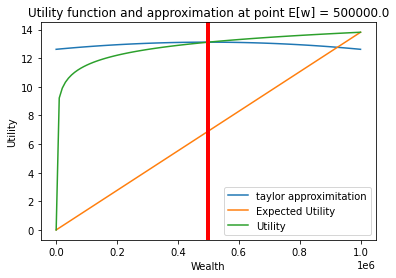

In [8]:
# Task2
def derivatives(wealth):
    """Second order derivative function"""
    return derivative(utility_function, wealth,n = 2)

def taylor_approx(wealth):
    """ 2 Order taylor approximation of the expectation of utility given wealth"""
    return utility_function(ew) + 1/2 * derivatives(ew) * (wealth - ew)**2

# expectation_of_utility = prob_win*utility_function(wealth_given_win) + prob_loose*utility_function(wealth_given_loss)
def expectation_util(wealth):
    """This function computes the expectation of the utitily much more general"""
    # with the general prob of 0.5
    return np.sum(utility_function(wealth) * 0.5)

x = np.linspace(1,1000000,num= 100)
taylor = taylor_approx(x)


x_values = [wealth_given_loss,wealth_given_win]
y_values = [utility_function(wealth_given_loss), utility_function(wealth_given_win)]

# plotting
plt.plot(x,taylor,label ="taylor approximitation")
plt.plot(x_values,y_values,label ="Expected Utility")
plt.plot(x,utility_function(x),label = "Utility")
plt.axvline(x = ew,linewidth = 4,color = "r")
plt.title(f"Utility function and approximation at point E[w] = {ew}")
plt.xlabel("Wealth")
plt.ylabel("Utility")
plt.legend()

plt.show()
